# Paired voting system
Reference: Sam Watcham's thesis (Chapter 2, Methods and Chapter 3 Fig 1.14)

In [1]:
from config import *
#%load_ext rpy2.ipython
checkpoints_dir="./write"
readin_type="raw" # or filtered

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
config              NA
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
igraph              0.8.2
ipykernel           5.3.2
ipython_genutils    0.2.0
jedi                0.17.1
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.33.0+1.g022ab0f
louvain             0.7.0
matplotlib          3.2.2
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.0.1
numba               0.50.1
numexpr             2.7.1
numpy               1.18.5
packaging           20.4
pandas              1.0.5
parso            

In [2]:
project_file = open("project.yaml")
project_dict = yaml.load(project_file, Loader=yaml.Loader) # Loader class can be yaml.FullLoader but only if you have after v
project_dict
align_dir = project_dict["cellranger_aligndir"]
numcol = project_dict['numcols_for_plotting']
samplefile = project_dict['samplefile']
cell_cycle_file=project_dict['cell_cycle_file']
genemarker_file = project_dict['genemarker_file']

In [3]:
sample_data = pd.read_csv(samplefile,
                          names=['sample_id', 'run_id','sample_name','condition','expected_cells']
                         )
sample_data

,sample_id,run_id,sample_name,condition,expected_cells
0,SIGAF7,RBG31359,WT_LK_sample_108,WT_LK,9993
1,SIGAH7,RBG31361,WT_LK_sample_110,WT_LK,9993
2,SIGAA8,RBG31362,UTX_LK_sample_111,UTX_LK,9993


## Project on to Niki's landscape

In [ ]:
def project_on_niki(adata):
    adata_niki = sc.read_h5ad("/home/vs401/rds1/refdata/10x/mm/niki_landscape/niki_passQC_norm_10K.h5ad")
    minmax(adata_niki)
    adata_niki.var_names_make_unique()
    adata_niki_all = adata_niki.copy()
    niki_hvg = np.genfromtxt('/home/vs401/rds1/refdata/10x/mm/niki_landscape/gene_names.txt', dtype=str)
    len(niki_hvg)
    
    
    

In [4]:
# niki's data
adata_niki = sc.read_h5ad("/home/vs401/rds1/refdata/10x/mm/niki_landscape/niki_passQC_norm_10K.h5ad")
minmax(adata_niki)
adata_niki.var_names_make_unique()
adata_niki_all = adata_niki.copy()

min = 0.0
max = 3392.019


In [5]:
niki_hvg = np.genfromtxt('/home/vs401/rds1/refdata/10x/mm/niki_landscape/gene_names.txt', dtype=str)
len(niki_hvg)

4666

In [6]:
adata = sc.read(checkpoints_dir+'/cluster.h5ad')

In [7]:
minmax(adata)
adata

min = -7.841873
max = 10.0


AnnData object with n_obs × n_vars = 18240 × 1179
    obs: 'sample_id', 'run_id', 'sample_name', 'condition', 'expected_cells', 'batch', 'doublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mit_pass', 'phase', 'S_score', 'G2M_score', 'louvain', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'bbknn', 'condition_colors', 'draw_graph', 'hvg', 'interesting_obs', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'mit_pass_colors', 'neighbors', 'pca', 'phase_colors', 'project_dict', 'sample_id_colors', 'sample_name_colors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
adata = anndata.AnnData(X=np.exp(adata.raw.X.todense())-1,
                        obs=adata.obs, 
                        var=adata.raw.var, 
                        obsm=adata.obsm,
                        uns = adata.uns)
adata

AnnData object with n_obs × n_vars = 18240 × 16255
    obs: 'sample_id', 'run_id', 'sample_name', 'condition', 'expected_cells', 'batch', 'doublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mit_pass', 'phase', 'S_score', 'G2M_score', 'louvain', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'bbknn', 'condition_colors', 'draw_graph', 'hvg', 'interesting_obs', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'mit_pass_colors', 'neighbors', 'pca', 'phase_colors', 'project_dict', 'sample_id_colors', 'sample_name_colors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'

In [9]:
OLG = np.intersect1d(niki_hvg, adata.var_names)
print("Genes common to both:")
print(len(OLG))
adata = adata[:,OLG].copy()
adata_niki = adata_niki[:,OLG].copy()

sc.pp.normalize_per_cell(adata, counts_per_cell_after=10000)
sc.pp.normalize_per_cell(adata_niki, counts_per_cell_after=10000)

sc.pp.log1p(adata)
sc.pp.log1p(adata_niki)

Genes common to both:
4461
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [10]:
# scale them together
data_comb = adata.concatenate(adata_niki)
sc.pp.scale(data_comb)
data_comb

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


AnnData object with n_obs × n_vars = 63042 × 4461
    obs: 'sample_id', 'run_id', 'sample_name', 'condition', 'expected_cells', 'batch', 'doublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mit_pass', 'phase', 'S_score', 'G2M_score', 'louvain', 'leiden', 'n_counts', 'sample', 'exp_groups', 'doublet_scores', 'percent_mito', 'n_counts_log', 'CellSubType'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'ensembl_ids-1', 'mean', 'std'
    obsm: 'X_draw_graph_fa'

In [11]:
adata = anndata.AnnData(X=data_comb[data_comb.obs['batch'] == '0',:].X, 
                        obs=adata.obs, 
                        var=adata.var, 
                        obsm=adata.obsm, 
                        uns=adata.uns)
adata_niki = anndata.AnnData(X=data_comb[data_comb.obs['batch'] == '1',:].X, 
                             obs=adata_niki.obs, 
                             var=adata_niki.var, 
                             obsm=adata_niki.obsm, 
                             uns=adata_niki.uns)

In [12]:
adata

AnnData object with n_obs × n_vars = 18240 × 4461
    obs: 'sample_id', 'run_id', 'sample_name', 'condition', 'expected_cells', 'batch', 'doublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mit_pass', 'phase', 'S_score', 'G2M_score', 'louvain', 'leiden', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'bbknn', 'condition_colors', 'draw_graph', 'hvg', 'interesting_obs', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'mit_pass_colors', 'neighbors', 'pca', 'phase_colors', 'project_dict', 'sample_id_colors', 'sample_name_colors', 'umap', 'log1p'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'

In [13]:
print(adata.shape)
print(adata_niki.shape)

(18240, 4461)
(44802, 4461)


### PCs for Niki

In [14]:
# PCs for Niki's data
pca_ = sklearn.decomposition.PCA(n_components=50, svd_solver='auto', random_state=0)
pca_.fit(adata_niki.X)

PCA(n_components=50, random_state=0)

In [15]:
# Project data and niki's data onto Niki's PCs
adata_proj = pca_.transform(adata.X)
adata_niki_proj = pca_.transform(adata_niki.X)

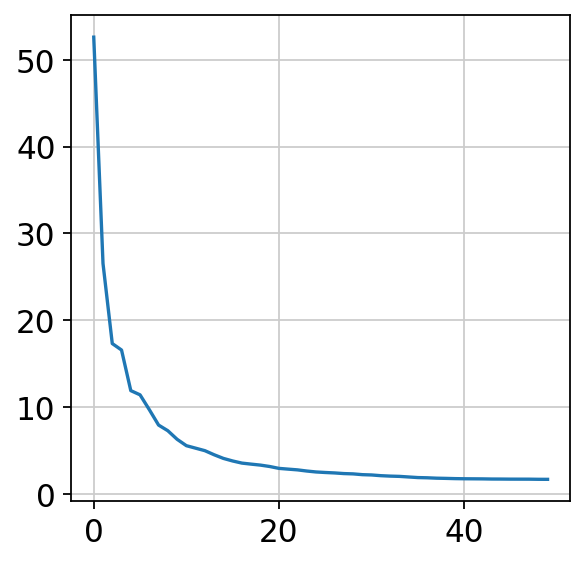

In [16]:
plt.plot(pca_.explained_variance_)

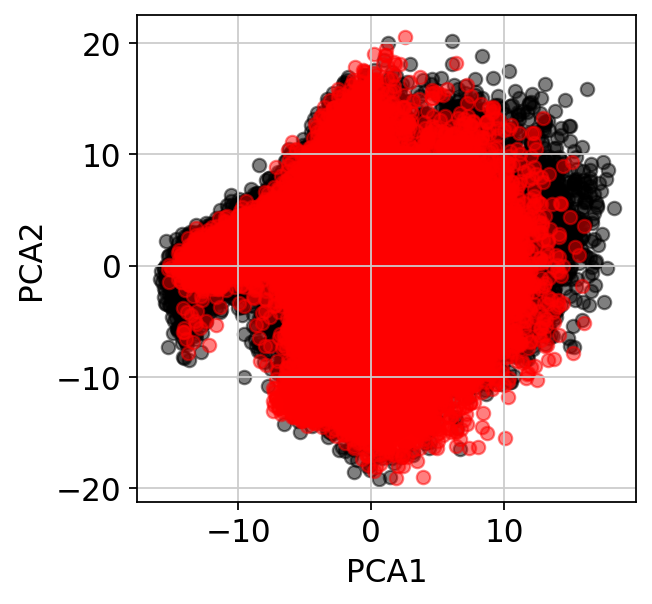

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(adata_niki_proj[:,0], adata_niki_proj[:,1], c='black', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
ax1.scatter(adata_proj[:,0], adata_proj[:,1], c='red', alpha=0.5)
plt.show()

In [18]:
# High memory process
npcs=40
from sklearn.metrics.pairwise import euclidean_distances
D_sub= euclidean_distances(adata_proj[:,0:npcs], adata_niki_proj[:,0:npcs])

In [19]:
print(adata_proj.shape)
print(adata_niki_proj.shape)
print(D_sub.shape)

(18240, 50)
(44802, 50)
(18240, 44802)


## Paired Voting System
* For every cell in the dataset its NN in the reference dataset gets 1 vote.
* Smooth out the votes for each cell in the reference dataset by sharing them equally among 100 NN in it. So if its vote is 40 you share 40/100 among each of them.
* Compute this for WT and mutant datasets. 
* Plot their difference or logFC etc on the reference landscape (UMAP)

### Decide number of neighbours

In [20]:
# Keep an even number of votes
tot_votes = 500000
tot_cells_adata = adata_proj.shape[0]
tot_cells_ref = adata_niki.shape[0]
votes_per_cell = np.int(np.floor(tot_votes/tot_cells_adata))
print(f"votes per cell = {votes_per_cell}")

votes per cell = 27


### Counting votes

In [21]:
from collections import Counter
from collections import defaultdict

ref_names = adata_niki.obs_names
votes = np.zeros(tot_cells_ref)
for i in range(D_sub.shape[0]):
    CellDis = D_sub[i,:]
    CellDis_sorted = np.argsort(CellDis)[:votes_per_cell]
    votes[CellDis_sorted] += 1
print(f"Run for {i} cells in the data")    

Run for 18239 cells in the data


### Smoothing the votes

In [22]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
ref_dist_matx = euclidean_distances(adata_niki_proj[:,0:npcs])

In [23]:
ref_dist_matx.shape

(44802, 44802)

In [24]:
ref_nn = []
nn_no = 100
hsc_nn_no = 20
cell_types = list(adata_niki.obs.CellSubType)
for i in range(adata_niki.shape[0]):
    CellDis = ref_dist_matx[i,:]
    celltype = cell_types[i]
    if celltype == "HSCs":
        lim = hsc_nn_no
    else:
        lim = nn_no
    CellDis_sorted = list(np.argsort(CellDis)[:lim])
    ref_nn.append(CellDis_sorted)


### Sharing of votes

In [25]:
for i in range(len(ref_nn)):
    nn = ref_nn[i]
    K = len(nn)
    votes_for_i = votes[i]
    to_share = votes_for_i/K
    votes[nn] += to_share

In [26]:
adata_niki_all.obs['votes'] = votes

In [27]:
adata_niki_all.write(checkpoints_dir+'/paired-voting.h5ad')

In [28]:
adata_niki_all[adata_niki.obs.CellSubType=='HSCs',:].obs

,sample,exp_groups,doublet_scores,percent_mito,n_counts,n_counts_log,n_genes,CellSubType,votes
index,,,,,,,,,
AAACCTGAGACAAAGG-1_SIGAB1,SIGAB1,LSK,0.767606,0.036797,7256.0,3.860697,2771,HSCs,9.144451
AAACCTGAGATATACG-1_SIGAB1,SIGAB1,LSK,0.843284,0.027545,14195.0,4.152135,4282,HSCs,8.505808
AAACCTGCAATAGCGG-1_SIGAB1,SIGAB1,LSK,0.373786,0.030788,4807.0,3.681874,1980,HSCs,0.000000
AAACCTGCAATGACCT-1_SIGAB1,SIGAB1,LSK,0.843284,0.028941,16136.0,4.207796,4501,HSCs,0.327239
AAACCTGCACATGGGA-1_SIGAB1,SIGAB1,LSK,0.289474,0.022623,4154.0,3.618571,1925,HSCs,7.075746
...,...,...,...,...,...,...,...,...,...
TTTACTGCAAAGTCAA-1_SIGAH1,SIGAH1,Kit,0.409091,0.023493,4214.0,3.624695,1954,HSCs,4.393202
TTTACTGTCACAATGC-1_SIGAH1,SIGAH1,Kit,0.318182,0.029874,3816.0,3.581608,1855,HSCs,0.227869
TTTATGCCAACGCACC-1_SIGAH1,SIGAH1,Kit,0.282609,0.033231,3912.0,3.592399,1802,HSCs,3.373781


In [29]:
adata_niki_all = sc.read(checkpoints_dir+'/paired-voting.h5ad')

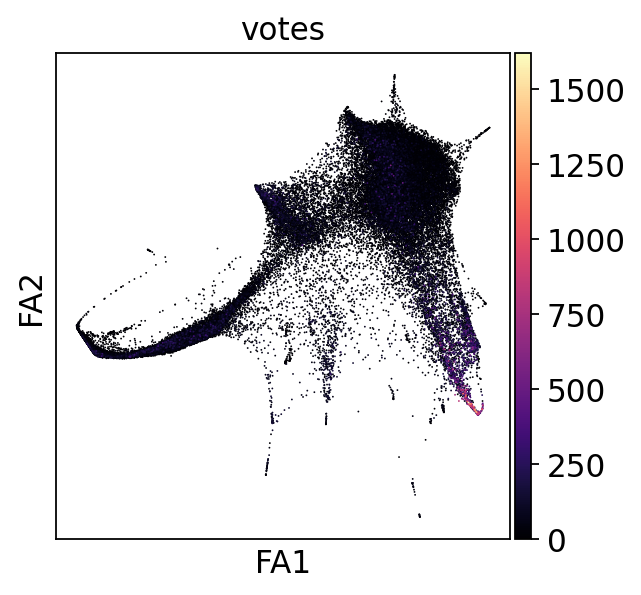

In [39]:
sc.pl.draw_graph(adata_niki_all, color="votes")